Predicting Salary of Adults with ML
Problem

. Predict whether a person makes over 50K a year.

. Dataset Source:- https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [1]:
#Loading EDA packages
import pandas as pd
import numpy as np

In [2]:
#loading ML packagses

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
column_names= ["Age", "workclass", "A", "education", "education-num", "marital status", "occupation", "relation", "race", "sex", "captial-gain", "captial-loss", "hours-per-week", "native-country", "class"]

In [4]:
df= pd.read_csv("adult.data", names= column_names)
df.head()

,Age,workclass,A,education,education-num,marital status,occupation,relation,race,sex,captial-gain,captial-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.columns

Index(['Age', 'workclass', 'A', 'education', 'education-num', 'marital status',
       'occupation', 'relation', 'race', 'sex', 'captial-gain', 'captial-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [6]:
df.shape

(32561, 15)

In [7]:
df.dtypes

Age                int64
workclass         object
A                  int64
education         object
education-num      int64
marital status    object
occupation        object
relation          object
race              object
sex               object
captial-gain       int64
captial-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [8]:
df.dtypes[df.dtypes== 'object']

workclass         object
education         object
marital status    object
occupation        object
relation          object
race              object
sex               object
native-country    object
class             object
dtype: object

In [9]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
d= {v: k for k,v in enumerate(set(df['workclass'].unique()))}

In [11]:
d

{' Local-gov': 0,
 ' Private': 1,
 ' Federal-gov': 2,
 ' Self-emp-inc': 3,
 ' Without-pay': 4,
 ' Self-emp-not-inc': 5,
 ' State-gov': 6,
 ' Never-worked': 7,
 ' ?': 8}

In [12]:
#to assign number to unique values

def generate_dict(data):
    my_dict= {v: k for k,v in enumerate(set(data))}
    return my_dict

In [13]:
generate_dict(df['education'].unique())

{' 1st-4th': 0,
 ' Masters': 1,
 ' 9th': 2,
 ' Some-college': 3,
 ' Assoc-acdm': 4,
 ' Assoc-voc': 5,
 ' Doctorate': 6,
 ' Preschool': 7,
 ' Bachelors': 8,
 ' 5th-6th': 9,
 ' HS-grad': 10,
 ' Prof-school': 11,
 ' 12th': 12,
 ' 11th': 13,
 ' 10th': 14,
 ' 7th-8th': 15}

In [14]:
obj_list= ["workclass", "education", "marital status", "occupation", "relation", "race", "sex", "native-country", "class"]
obj_names=  ["d_workclass", "d_education", "d_marital_status", "d_occupation", "d_relation", "d_race", "d_sex", "d_native_country", "d_class"]
for i,j in zip(obj_names, obj_list):
    print(f'{i}= generate_dict(df["{j}"].unique())')

d_workclass= generate_dict(df["workclass"].unique())
d_education= generate_dict(df["education"].unique())
d_marital_status= generate_dict(df["marital status"].unique())
d_occupation= generate_dict(df["occupation"].unique())
d_relation= generate_dict(df["relation"].unique())
d_race= generate_dict(df["race"].unique())
d_sex= generate_dict(df["sex"].unique())
d_native_country= generate_dict(df["native-country"].unique())
d_class= generate_dict(df["class"].unique())


In [15]:
d_workclass= generate_dict(df["workclass"].unique())
d_education= generate_dict(df["education"].unique())
d_marital_status= generate_dict(df["marital status"].unique())
d_occupation= generate_dict(df["occupation"].unique())
d_relation= generate_dict(df["relation"].unique())
d_race= generate_dict(df["race"].unique())
d_sex= generate_dict(df["sex"].unique())
d_native_country= generate_dict(df["native-country"].unique())
d_class= generate_dict(df["class"].unique())

In [16]:
d_sex

{' Female': 0, ' Male': 1}

In [17]:
df2= df

## Mapping Dataset

In [18]:
df2["workclass"]= df2["workclass"].map(d_workclass)
df2["education"]= df2["education"].map(d_education)
df2["marital status"]= df2["marital status"].map(d_marital_status)
df2["occupation"]= df2["occupation"].map(d_occupation)
df2["relation"]= df2["relation"].map(d_relation)
df2["race"]= df2["race"].map(d_race)
df2["sex"]= df2["sex"].map(d_sex)
df2["native-country"]= df2["native-country"].map(d_native_country)
df2["class"]= df2["class"].map(d_class)


In [19]:
df2.head(10)

,Age,workclass,A,education,education-num,marital status,occupation,relation,race,sex,captial-gain,captial-loss,hours-per-week,native-country,class
0,39,6,77516,8,13,2,3,1,3,1,2174,0,40,15,0
1,50,5,83311,8,13,0,9,2,3,1,0,0,13,15,0
2,38,1,215646,10,9,3,13,1,3,1,0,0,40,15,0
3,53,1,234721,13,7,0,13,2,0,1,0,0,40,15,0
4,28,1,338409,8,13,0,11,4,0,0,0,0,40,38,0
5,37,1,284582,1,14,0,9,4,3,0,0,0,40,15,0
6,49,1,160187,2,5,6,2,1,0,0,0,0,16,4,0
7,52,5,209642,10,9,0,9,2,3,1,0,0,45,15,1
8,31,1,45781,1,14,2,11,1,3,0,14084,0,50,15,1
9,42,1,159449,8,13,0,9,2,3,1,5178,0,40,15,1


In [20]:
df2.to_csv("Adult_Salary_Dataset_2.csv") 

In [21]:
df2.dtypes

Age               int64
workclass         int64
A                 int64
education         int64
education-num     int64
marital status    int64
occupation        int64
relation          int64
race              int64
sex               int64
captial-gain      int64
captial-loss      int64
hours-per-week    int64
native-country    int64
class             int64
dtype: object

In [22]:
## Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Correlation Plot

In [23]:
corr_mat= df2.corr()

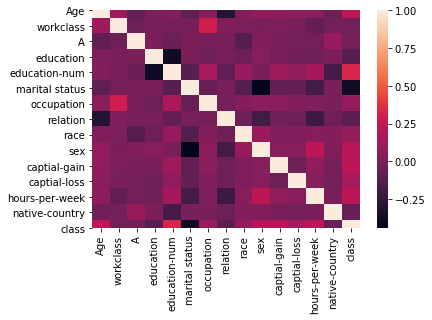

In [24]:
sns.heatmap(corr_mat)


<Figure size 720x1440 with 0 Axes>

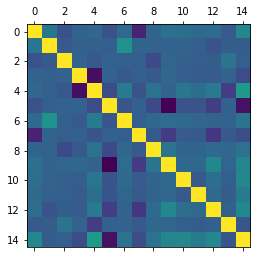

In [25]:
#plotting with matplotlib

plt.figure(figsize= (10,20)) 
plt.matshow(corr_mat)
plt.show()

In [26]:
#value counts

df['class'].value_counts()

0    24720
1     7841
Name: class, dtype: int64

<BarContainer object of 2 artists>

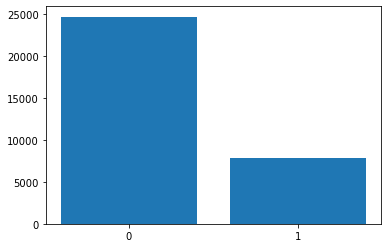

In [27]:
#plotting bar
plt.bar(['0','1'], df['class'].value_counts())

### Machine Learning Aspect

In [28]:
df2.columns

Index(['Age', 'workclass', 'A', 'education', 'education-num', 'marital status',
       'occupation', 'relation', 'race', 'sex', 'captial-gain', 'captial-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [29]:
df2.shape

(32561, 15)

In [30]:
df2.iloc[:,0:14].columns

Index(['Age', 'workclass', 'A', 'education', 'education-num', 'marital status',
       'occupation', 'relation', 'race', 'sex', 'captial-gain', 'captial-loss',
       'hours-per-week', 'native-country'],
      dtype='object')

In [31]:
df2.iloc[:,14].name

'class'

In [32]:
x = df2.iloc[:,0:14].values
y = df2.iloc[:,14].values

In [33]:
x,y

(array([[    39,      6,  77516, ...,      0,     40,     15],
        [    50,      5,  83311, ...,      0,     13,     15],
        [    38,      1, 215646, ...,      0,     40,     15],
        ...,
        [    58,      1, 151910, ...,      0,     40,     15],
        [    22,      1, 201490, ...,      0,     20,     15],
        [    52,      3, 287927, ...,      0,     40,     15]], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

### Splitting into Training and Testing set

In [34]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
print(x_train.shape)
print(y_train.shape)

(21815, 14)
(21815,)


### Logistic Regression

In [37]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
 

LogisticRegression()

In [40]:
# Accuracy of our Model
logit.score(x_test,y_test)

0.8038339847385073

### Saving the Model

In [41]:
import joblib

In [42]:
salary_logit_model = open("salary_logit_model.pkl","wb")
joblib.dump(logit,salary_logit_model)

In [43]:
salary_logit_model.close()

### Naive Bayes

In [44]:
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB()

In [45]:
nv.score(x_test,y_test)

0.7863391029220175

In [46]:
salary_nv_model = open("salary_nv_model.pkl","wb")
joblib.dump(nv,salary_nv_model)

In [47]:
salary_nv_model.close()

### Random Forest

In [48]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(x_train,y_train)
                            

RandomForestClassifier(max_depth=4)

In [49]:
rf.score(x_test,y_test)

0.8492462311557789

In [50]:
# Save Model
salary_rf_model = open("salary_rf_model.pkl","wb")
joblib.dump(rf,salary_rf_model)

In [51]:
salary_rf_model.close()

### Cross Validation 

In [52]:
cv_scores = cross_val_score(LogisticRegression(),x,y,cv=10)

In [53]:
cv_scores

array([0.79674547, 0.80128993, 0.79453317, 0.7960688 , 0.79545455,
       0.79914005, 0.79453317, 0.80282555, 0.7972973 , 0.80958231])

In [54]:
np.mean(cv_scores)

0.7987470287017416

Mean accuracy is 79.8% for Logistic Regression.

In [55]:
cv_scores_2 = cross_val_score(MultinomialNB(),x,y,cv=10)

In [56]:
cv_scores_2

array([0.78231501, 0.78194103, 0.77886978, 0.77979115, 0.78071253,
       0.79084767, 0.77364865, 0.78163391, 0.78409091, 0.79207617])

In [57]:
np.mean(cv_scores_2)

0.782592680742819

Mean accuracy is 78.2% for Multinomial Naive Bayes Classifier.

In [58]:
cv_scores_3 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=2),x,y,cv=10)

In [59]:
cv_scores_3

array([0.79674547, 0.8009828 , 0.79545455, 0.8034398 , 0.78869779,
       0.8022113 , 0.79699017, 0.80589681, 0.80374693, 0.7972973 ])

In [60]:
np.mean(cv_scores_3)

0.7991462916010045

Mean accuracy is 79.9% for Random Forest Classifier.

In [61]:
##changing paramerters

In [62]:
cv_scores_4 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=4),x,y,cv=10)

In [63]:
cv_scores_4

array([0.83788763, 0.85012285, 0.85503686, 0.84152334, 0.84981572,
       0.84858722, 0.84459459, 0.85749386, 0.85227273, 0.84183047])

In [64]:
np.mean(cv_scores_4)

0.8479165267927934

Mean accuracy is 84.7% for Random Forest Classifier with max depth 4

## Model Interpretation 

In [65]:
import eli5

In [66]:
# Showing the Weight for our model
eli5.show_weights(logit, top=10)

In [67]:
df.head()

,Age,workclass,A,education,education-num,marital status,occupation,relation,race,sex,captial-gain,captial-loss,hours-per-week,native-country,class
0,39,6,77516,8,13,2,3,1,3,1,2174,0,40,15,0
1,50,5,83311,8,13,0,9,2,3,1,0,0,13,15,0
2,38,1,215646,10,9,3,13,1,3,1,0,0,40,15,0
3,53,1,234721,13,7,0,13,2,0,1,0,0,40,15,0
4,28,1,338409,8,13,0,11,4,0,0,0,0,40,38,0


In [68]:
d_class

{' <=50K': 0, ' >50K': 1}

In [69]:
df.columns

Index(['Age', 'workclass', 'A', 'education', 'education-num', 'marital status',
       'occupation', 'relation', 'race', 'sex', 'captial-gain', 'captial-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [70]:
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

In [71]:
class_names = ["<=50k",">50k"]

In [72]:
eli5.show_weights(logit,feature_names=feature_names,target_names=class_names)

Weight?,Feature
+0.031,hours-per-week
+0.024,age
+0.010,education-num
+0.008,sex
+0.001,capital-loss
+0.000,capital-gain
-0.000,fnlwgt
-0.010,<BIAS>
-0.016,race
-0.016,occupation


In [73]:
x_test[10]

array([    43,      5, 241895,      8,     13,      2,     10,      1,
            3,      1,      0,      0,     42,     15], dtype=int64)

In [74]:
# Reshape To A Single Sample (1,-1)
mysample = np.array(x_test[10]).reshape(1, -1)

In [75]:
logit.predict(mysample)

array([0], dtype=int64)

In [76]:
# Show Explaination For A Single Prediction
eli5.show_prediction(logit, x_test[10],feature_names=feature_names,target_names=class_names)

In [77]:
# Same as show_weights
eli5.explain_weights(logit)

Weight?,Feature
+0.031,x12
+0.024,x0
+0.010,x4
+0.008,x9
+0.001,x11
+0.000,x10
-0.000,x2
-0.010,<BIAS>
-0.016,x8
-0.016,x6


In [78]:
import joblib
joblib.__version__

'1.1.0'